In [1]:
import cv2
import time
import pytesseract
import easyocr
from custom_utils import *
%matplotlib inline
import matplotlib.pyplot as plt
reader = easyocr.Reader(['bn'])

/home/aci/anaconda3/envs/HTR/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


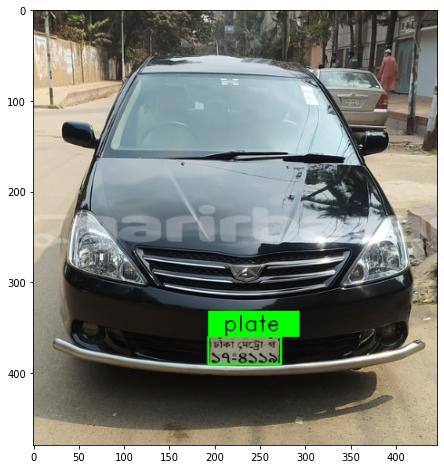

In [38]:
source='./test/car4.jpg'
model_path='detection_best.pt'

img0= cv2.imread(source)
detected,cropped=decode_image(img0,model_path)
small_frame = cv2.resize(detected, (0, 0), fx=0.8, fy=0.8)
small_frame_rgb = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(small_frame_rgb)

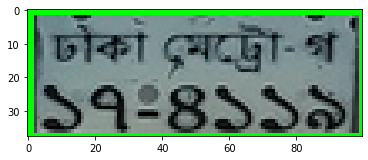

In [34]:
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
adaptive_threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 11)
#adaptive_threshold=cv2.equalizeHist(adaptive_threshold)
plt.imshow(cropped)

In [35]:
result = reader.readtext(gray)
for res in result:
    print(res[1])

ঢাকা মেট্রো-গ
১৭-৪১১৯


In [17]:
result

[([[2, 0], [96, 0], [96, 22], [2, 22]], 'ঢাকা মেট্রো-গ', 0.5367343223858504),
 ([[0, 18], [98, 18], [98, 38], [0, 38]], '১৭-৪১১৯', 0.8002106332920107)]

In [6]:
result = reader.readtext(gray,paragraph="False")
try:
    text=result[0][1]
except:
    text='unable to detect'
print(text)
show_image(cropped)

ঢাকা মেট্রো-গ ১৭-৪১১৯


In [59]:
result = reader.readtext(cropped)
text = ''
for res in result:
    text = text + res[1] + '\n'
text

'ঢাকা মেডট্রো\n১৭-৪১১৯\n'